In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import seaborn as sns
import os
import numpy as np

In [ ]:
#Settings for the plots

#Set the path of the different folders
pathFiles = '../Files/SingleFactorExperiment/'
pathBoxplots = '../Files/Results/Plots/Boxplots/'

#Set the font to latex font
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['text.usetex'] = True  #
#Set the color scheme for  base model:  #00876C
#Set the color scheme for the ransomware attack: #4664AA

#Set the color scheme for the base model
baseColor = '#079EDE' #Color from KIT guidelines
ransomwareColor = '#A22223' #Color from KIT guidelines
thirdColor = '#00876C' #Color from KIT guidelines

pd.set_option('display.max_columns', None)

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

########################################################################################################################
# Main Settings
########################################################################################################################

# Define the KPIs you wish to plot
kpi_columns = ['total_num_patients', 'total_num_ed_patients',
       'total_num_patients_entered', 'total_num_ed_patients_entered',
       'mortality_rate', 'total_num_deceased_patients', 'total_num_lwbs',
       'ed_throughput_per_day', 'avg_queue_length_ed',
       'avg_queue_length_radio', 'avg_queue_length_lab',
       'avg_queue_length_treat_phy', 'avg_queue_length_mon_nurse',
       'avg_queue_length_surgery', 'avg_edwin_score',
       'avg_door_to_doctor_time', 'avg_waiting_time_icu',
       'avg_inward_utilization', 'avg_icu_utilization', 'avg_waiting_time_ed',
       'avg_total_waiting_time', 'throughput_overall',
       'rate_target_time_mts_full', 'rejected_Patients_ED',
       'postponed_Patients_RAD', 'postponed_Patients_OR',
       'postponed_Patients_LAB',
       'avg_doctor_utilization_surgery', 'avg_doctor_utilization_radio',
       'avg_xray_utilization', 'avg_doctor_utilization_lab',
       'avg_nurse_utilization_lab', 'Rate_LWBS', 'adjusted_daily_hospitalwide_throughput',
       'adjusted_daily_hospitalwide_throughput_without_rejected']

# Titles for plots
titles = [
    'Absolute Throughput of Patients Hospital-wide',
    'Absolute Throughput of Patient ED',
    'Absolute Hospital Arrivals',
    'Absolute ED Arrivals',
    'Mortality Rate',
    'Absolute Deaths',
    'LWBS Count',
    'ED Throughput',
    'ED Queue Length',
    'Radiology Queue Length',
    'Laboratory Queue Length',
    'Physician Queue Length',
    'Nursing Monitoring Queue Length',
    'Surgery Queue Length',
    'Average EDWIN Score',
    'Door-to-Doctor Time',
    'ICU Waiting Time',
    'Inward Utilization Rate',
    'ICU Utilization Rate',
    'ED Waiting Time',
    'Hospital-wide Waiting Time',
    'Hospital-wide Throughput',
    'Rate of MTS Target Time not Reached',
    'Rejected Patients ED',
    'Postponed Patients RAD',
    'Postponed Patients OR',
    'Postponed Patients LAB',
    'Surgoen Utilization Rate',
    'Radiologist Utilization Rate',
    'Xray Utilization Rate',
    'Lab Doctor Utilization Rate',
    'Lab Nurse Utilization Rate',
    'Rate LWBS',
    'Adjusted Hospital-wide Throughput',
    'Adjusted Hospital-wide Throughput without Rejected'
]

filter_columns = ['mortality_rate', 'avg_total_waiting_time', 'throughput_overall', 'rate_target_time_mts_full',
                  'ed_throughput_per_day', 'avg_waiting_time_ed', 'avg_icu_utilization', 'avg_inward_utilization',
                  'Rate_LWBS', 'avg_door_to_doctor_time']

#SCENARIOS
scenarios = ['NO', 'ALL', 'ED', 'RAD','LAB', 'OR', 'ICU', 'INP',]# 'NORE']#,'LAB-NO','RAD-NO']
#scenarios = ['NO', 'ALL', 'ED', 'RAD', 'OR', 'LAB', 'ICU', 'INP','RAD-NP']

dataset_names = [
    "DatasetEDWIN",
    "DatasetNurseLAB",
    "DatasetInwardUtiliaztion",
    "DatasetICUUtilaztion",
    "DatasetDeceasedPatients",
    "DatasetLWBS",
    "DatasetDoctorRadio",
    "DatasetThroughputEDCorrect",
    "DatasetQueueImageRad",
    "DatasetQueueLAB",
    "DatasetEDDoctorUtilization",
    "DatasetQueueEmergencyDepartment",
    "DatasetDeclinedPatients",
    "DatasetPostponedRAD",
    "DatasetDoctorSurgery",
    "DatasetPostponedOR",
    "DatasetQueueQueueTreatPhy",
    "DatasetDoctorLAB",
    "DatasetNurseUtilization",
    "DatasetQueueQueueOR",
    "DatasetPostponedLAB",
    "DatasetTargetMTSFull",
    "DatasetXRayRadio",
    "DatasetOverallTroughput"
]



# titles_dataset = [
#     'EDWIN Score',
#     'Nurse Utilization LAB',
#     'Inward Utilization',
#     'ICU Utilization',
#     'Deceased Patients per Day',
#     'Total Number of LWBS',
#     'Radiologist Utilization',
#     'ED Throughput',
#     'Queue Length Image Rad',
#     'Queue Length LAB',
#     'Emergency Doctor Utilization',
#     'Queue Length ED',
#     'Declined Patients ED',
#     'Postponed RAD',
#     'Surgeon Utilization',
#     'Postponed Patients OR',
#     'Queue Length Treat Phy',
#     'Doctor Utilization LAB',
#     'Nurse Utilization',
#     'Queue Length OR',
#     'Postponed Patients LAB',
#     'Rate of Exceeded Maximum Waiting Time According to MTS',
#     'XRay Utilization Rate',
#     'Overall Throughput'
# ]

titles_dataset = [
    'EDWIN Score',                        # Keep as is
    'Lab Nurse Utilization Rate',         # Match with other utilization metrics
    'Inward Utilization Rate',                 # Keep as is
    'ICU Utilization Rate',                    # Keep as is
    'Deceased Patients',                       # Match with titles
    'LWBS Count',                         # Match with titles
    'Radiologist Utilization Rate',       # Match with titles
    'ED Throughput',                # Match with titles
    'Radiology Queue Length',             # Match with titles
    'Laboratory Queue Length',            # Match with titles
    'ED Physician Utilization Rate',      # Standardize format
    'ED Queue Length',                    # Match with titles
    'Number of Rejected Patients ED',                  # Match with titles
    'Postponed Patients RAD',        # Match with titles
    'Surgeon Utilization Rate',           # Match with titles
    'Postponed Patients OR',          # Match with titles
    'Physician Queue Length',             # Match with titles
    'Lab Physician Utilization Rate',     # Match with titles
    'Nurse Utilization Rate',             # Standardize format
    'Surgery Queue Length',               # Match with titles
    'Postponed Patients LAB',       # Match with titles
    'Rate of MTS Target Time not Reached',  # Match with titles
    'X-ray Utilization Rate',         # Match with titles
    'Hospital-wide Throughput'
]

# Define high contrast colors for scenarios
scenario_colors = {
    'NO': '#006BA4',     # dark blue - easier to see than black
    'ALL': '#FF7F0E',   # orange
    'RAD': '#7F7F7F',  # green
    'LAB': '#D62728',  # red
    'OR': '#9467BD',  # purple
    'LAB-NO': '#FFD700',  # brown
    'ED': '#E377C2',  # pink
    'ICU': '#2CA02C',  # green
    'INP': '#17BECF',  # blue
    'RAD-NO': '#1F77B4',  # blue
    'NORE': '#FFD700',  # yellow
    }

marker_styles = {
    'NO': 's',
    'ALL': '^',
    'ED': 'h',
    'RAD': 'o',
    'OR': 'D',
    'LAB': 'd',
    'ICU': 'p',
    'INP': 'v',
    'NORE': 'x',
    'RAD-NO': 's',
}

# line_styles = {
#     'NO': '-',
#     'FULL': '--',
#     'ED': '-.',
#     'RAD': ':',
#     'OR': '-',
#     'LAB': '--',
#     'INP': '-.',
#     'ICU': ':',
# }

color_palette = scenario_colors

In [ ]:
def read_specific_dataset(path, dataset_name, scenario_label):
    """
    Reads a specific dataset from the "Datasets" folder and returns it as a DataFrame.
    """
    file_path = os.path.join(path, f'{scenario_label}/Datasets/{dataset_name}.csv')
    
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return pd.DataFrame()  # Return an empty DataFrame if the file does not exist
    
    df = pd.read_csv(file_path, sep=",")  # Read the CSV file
    df = df.set_index(df.columns[0])  # Set the first column as the index
    df = df.reset_index(drop=True)  # Reset the index to remove the old index

    keywords = ['Utilization', 'Utiliaztion', 'Nurse', 'Utilaztion', 'Doctor']
    if any(keyword in dataset_name for keyword in keywords):
        df = df * 100
    
    # Calculate SUM and Mean before adding them as columns
    sum_values = df.sum(axis=1)
    mean_values = df.mean(axis=1)


    # Add additional columns
    df['SUM'] = sum_values
    df['Mean'] = mean_values
    df['Scenario'] = scenario_label
    df['Dataset'] = f'Dataset{dataset_name}.csv'
    return df

def preprocess_data(file_path, department_label):
    df = pd.read_csv(file_path, index_col=False)

    # Check if the column ' total_num_ed_patients' exists and rename it
    if ' total_num_ed_patients' in df.columns:
        df.rename(columns={' total_num_ed_patients': 'total_num_ed_patients'}, inplace=True)

    if ' total_num_patients_entered' in df.columns:
        df.rename(columns={' total_num_patients_entered': 'total_num_patients_entered'}, inplace=True)
    
    # Calculate the rate of patients who left without being seen
    df['Rate_LWBS'] = (df['total_num_lwbs'] * 100) / df['total_num_ed_patients_entered']    
    
    # Multiply all utilization columns by 100
    utilization_columns = [col for col in df.columns if 'utilization' in col.lower()]
    for col in utilization_columns:
        df[col] = df[col] * 100

    # Round the values to 0 decimals since only full patients are possible
    for kpi in [
        'avg_queue_length_ed', 'avg_queue_length_radio', 'avg_queue_length_lab',
        'avg_queue_length_surgery', 'throughput_overall', 'ed_throughput_per_day',
        'postponed_Patients_OR', 'postponed_Patients_RAD', 'rejected_Patients_ED']:
        df[kpi] = df[kpi].round(0)
        
    df['Scenario'] = department_label
    return df

def filter_outliers(df, kpi_columns, scenarios, filter_columns):
    """
    Filter outliers only for specified columns using IQR method
    Args:
        df: DataFrame with all data
        kpi_columns: All KPI columns in dataset
        scenarios: List of scenarios
        filter_columns: List of columns to apply outlier filtering
    Returns:
        Filtered DataFrame
    """
    mask = pd.Series([True] * len(df), index=df.index)
    
    # Only filter columns that are in filter_columns
    columns_to_filter = [col for col in kpi_columns if col in filter_columns]
    
    for column in columns_to_filter:
        for scenario in scenarios:
            subset = df[df['Scenario'] == scenario]
            Q1 = subset[column].quantile(0.25)
            Q3 = subset[column].quantile(0.75)
            IQR = Q3 - Q1
            non_outlier_indices = subset.index[
                ~((subset[column] < (Q1 - 1.5 * IQR)) | 
                  (subset[column] > (Q3 + 1.5 * IQR)))
            ]
            mask.loc[subset.index] &= subset.index.isin(non_outlier_indices)
    
    return df[mask]


def recalculate_mortality_rate(df_combined, pathFiles, departments):
    for dept in departments:
        # Read specific datasets for each department
        df_overall = read_specific_dataset(pathFiles, 'DatasetOverallTroughput', dept)
        df_deceased = read_specific_dataset(pathFiles, 'DatasetDeceasedPatients', dept)
        df_doctor_utilization = read_specific_dataset(pathFiles, 'DatasetEDDoctorUtilization', dept)


        # Calculate mortality rate
        mortality_rate = df_deceased['SUM'] * 100 / df_overall['SUM']
        # Update df_combined with new mortality rates for the specific department
        df_combined.loc[df_combined['Scenario'] == dept, 'mortality_rate'] = mortality_rate.values
        df_combined.loc[df_combined['Scenario'] == dept, 'avg_doctor_utilization'] = df_doctor_utilization['Mean'].values


    return df_combined

def get_rounding_precision(column_name):
    """
    Determine rounding precision based on column name
    
    Parameters:
    column_name (str): Name of the column
    
    Returns:
    int: Rounding precision (0 or 1)
    """
    if 'Queue' in column_name or 'Throughput' in column_name:
        return 0
    return 1


def plot_kpis(df_filtered, kpi_columns, secnarios, color_palette, pathBoxplots, titles):
    for idx, column in enumerate(kpi_columns):
        fig, ax = plt.subplots(figsize=(10, 6))

        plt.grid(axis='y', linestyle=':', color='gray', alpha=0.8)
        
        sns.boxplot(
            data=df_filtered, x='Scenario', y=column, whis=3,
            order=secnarios, palette=color_palette, linewidth=1.5, width=0.6,
            ax=ax)
                
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        print(f"KPI: {column}")
        rounding = get_rounding_precision(column)
        print(df_filtered.groupby('Scenario')[column].describe().round(rounding))
        plt.title(f'KPI: {titles[idx]}', fontsize=20)

        # Determine y-axis label based on KPI column name
        if 'Rate' in titles[idx]:
            ylabel = rf'{titles[idx]} (\%)'
        elif 'Time' in titles[idx]:
            ylabel = f'{titles[idx]} (min)'
        elif 'Utilization' in titles[idx] or 'utilization' in titles[idx]:
            ylabel = rf'{titles[idx]} (\%)'
        elif 'Postponed' in titles[idx]:
            ylabel = f'{titles[idx]} (Patients)'
        elif 'Rejected' in  titles[idx]:
            ylabel = f'{titles[idx]} (Patients)'
        elif 'Absolute' in titles[idx]:
            ylabel = f'{titles[idx]} (Patients)'
        elif 'Throughput' in titles[idx]:
            ylabel = f'{titles[idx]} (Patients/Day)'
        elif 'Queue' in titles[idx]:
            ylabel = f'{titles[idx]} (Patients)'
        elif 'EDWIN' in titles[idx]:
            ylabel = 'EDWIN Score'
        elif 'LWBS' in titles[idx]:
            ylabel = 'Number of LWBS (Patients)'
        else:
            ylabel = titles[idx]

        #Set Xtiacks 45 degree
        #plt.xticks(rotation=45)
        plt.ylabel(ylabel, fontsize=14)
        plt.xlabel('Scenario', fontsize=14)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.savefig(f'Box_plots_single_factor/box_plot_kpi_{column}.pdf', format='pdf', bbox_inches='tight')
        plt.show()
        plt.close()

def plot_simulation_runs(df, scenario, title, relative_indices=None):
    """
    Plots the values of specific simulation runs with error bars for a given scenario.
    """
    # Filter the DataFrame for the specific scenario
    df_scenario = df[df['Scenario'] == scenario]
    
    # Select only the columns representing simulation days
    simulation_days = df_scenario.columns[:50]
    
    plt.figure(figsize=(12, 6))
    
    if relative_indices is None:
        # Calculate the mean and standard error for each simulation day
        mean_values = df_scenario[simulation_days].mean()
        std_error = df_scenario[simulation_days].sem()
        
        # Plot the mean values with error bars
        plt.errorbar(mean_values.index, mean_values, yerr=std_error, fmt='-o', ecolor='r', capsize=5, label='Mean')
    else:
        # Plot the specific simulation runs using relative indices
        for rel_idx in relative_indices:
            if rel_idx < len(df_scenario):
                abs_idx = df_scenario.index[rel_idx]
                plt.plot(simulation_days, df_scenario.loc[abs_idx, simulation_days], '-o', label=f'Simulation {abs_idx}')
            else:
                print(f"Relative index {rel_idx} out of range for scenario {scenario}")           
    
    plt.title(title)
    plt.xlabel('Simulation Day')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_ed_throughput(df_combined, pathFiles, scenarios):
    """
    Calculates the ED Throughput using the DatasetEDThroughputCorrect and updates df_combined.
    """
    for scenario in scenarios:
        # Construct the file path
        file_path = os.path.join(pathFiles, f'{scenario}/Datasets/DatasetThroughputEDCorrect.csv')
        
        # Check if the file exists
        if not os.path.exists(file_path):
            print(f"File not found for scenario {scenario}: {file_path}")
            continue
        
        # Read the specific dataset for each scenario
        df_ed_throughput = pd.read_csv(file_path, sep=",")
        
        # Set the first column as the index and reset the index
        df_ed_throughput = df_ed_throughput.set_index(df_ed_throughput.columns[0])
        df_ed_throughput = df_ed_throughput.reset_index(drop=True)
        
        # Calculate the mean ED Throughput for each day
        mean_ed_throughput = df_ed_throughput.mean(axis=1)
        
        # Update df_combined with the new ED Throughput values for the specific scenario
        df_combined.loc[df_combined['Scenario'] == scenario, 'ed_throughput_per_day'] = mean_ed_throughput.values

    return df_combined


def plot_mean_and_error(df, ylableTitle, title, start_day=None, end_day=None, output_dir='Line_plots_single_factor/'):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
    for scenario in df['Scenario'].unique():
        scenario_df = df[df['Scenario'] == scenario]
        
        if start_day is not None and end_day is not None:
            simulation_days = scenario_df.columns[start_day:end_day]
        else:
            simulation_days = scenario_df.columns[:50]
        
        mean_values = scenario_df[simulation_days].mean()
        std_error = scenario_df[simulation_days].sem()

        ax.errorbar(mean_values.index, mean_values, yerr=std_error, fmt='-o',
                    label=scenario, capsize=5, color=scenario_colors[scenario], 
                    marker=marker_styles[scenario], linewidth=2, markersize=7)
    # Get y-axis limits and calculate extended height
    ymin, ymax = ax.get_ylim()
    span_height = ymax + (ymax - ymin) * 0.1
    text_y = ymax + (ymax - ymin) * 0.05

    # Add EDWIN Score background if applicable
    if 'EDWIN Score' in title:
        ax.axhline(y=1.08, color='black', alpha=0.4, linestyle='--')
        ax.axhline(y=1.83, color='black', alpha=0.4, linestyle='--')

        # Calculate x-position (80% of plot width)
        x_pos = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.8
        
        # Add condition labels inside plot with background boxes
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        

        # Normal Conditions
        ax.text(x_pos, 0.7, 'Normal Conditions',
                verticalalignment='center',
                horizontalalignment='left',
                fontsize=14,
                color='darkgreen',
                fontweight='bold',
                bbox=bbox_props)
        
        # Crowded
        ax.text(x_pos, 1.455, 'Crowded',
                verticalalignment='center',
                horizontalalignment='left',
                fontsize=14,
                color='darkorange',
                fontweight='bold',
                bbox=bbox_props)
        
        # Overcrowded
        ax.text(x_pos, (ymax + 1.83)/2, 'Overcrowded',
                verticalalignment='center',
                horizontalalignment='left',
                fontsize=14,
                color='darkred',
                fontweight='bold',
                bbox=bbox_props)
    
    # Add colored regions with text
    ax.axvspan(0, 2, ymin=0, ymax=1.1, color='red', alpha=0.25)
    ax.text(1, text_y, 'Attack', 
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='darkred',
            fontweight='bold')
    
    ax.axvspan(2, 9, ymin=0, ymax=1.1, color='orange', alpha=0.25)
    ax.text(5.5, text_y, '1. Countermeasure',
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='darkorange',
            fontweight='bold')
    
    ax.axvspan(9, 14, ymin=0, ymax=1.1, color='yellow', alpha=0.25)
    ax.text(11.5, text_y, '2. Countermeasure',
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='goldenrod',
            fontweight='bold')
    
    # Update y-axis limits
    ax.set_ylim(ymin, span_height)

    if 'Time' in ylableTitle:
        ylabel = f'{ylableTitle} (min)'
    elif 'Utilization' in ylableTitle or 'utilization' in title:
        ylabel = rf'{ylableTitle} (\%)'
    elif 'Postponed' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients)'
    elif 'Rejected' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients)'
    elif 'Throughput' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients/Day)'
    elif 'Rate' in ylableTitle:
        ylabel = f'LWBS Rate (\%)'
    elif 'Queue' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients)'
    elif 'EDWIN' in ylableTitle:
        ylabel = 'EDWIN Score'
    elif 'Deceased' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients/Day)'
    elif 'LWBS' in ylableTitle:
        ylabel = 'Number of LWBS (Patients)'
    else:
        ylabel = ylableTitle

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Simulation Day', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(bbox_to_anchor=(1, 0.5),
            loc='center left',
            borderaxespad=0,
            frameon=True,
            labelspacing=1.2,     # Vertical space between legend entries
            handletextpad=0.5,    # Space between marker and text
            borderpad=0.5,        # Padding inside legend box
            title_fontsize=12,
            framealpha=1.0)       # Solid background
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.tick_params(labelsize=14)
    plt.savefig(f'{output_dir}line_plot_kpi_{title}.pdf', format='pdf', bbox_inches='tight')
    plt.show()


def calculate_adjusted_throughput(df):
    """
    Calculate adjusted daily hospital-wide throughput metrics
    
    Parameters:
    df (DataFrame): Combined DataFrame containing all scenarios and metrics
    
    Returns:
    DataFrame: Original DataFrame with two new columns for adjusted throughput
    """
    # Create copy of DataFrame to avoid modifying original
    df_new = df.copy()
    
    # Calculate adjusted daily throughput including postponed patients
    df_new['adjusted_daily_hospitalwide_throughput'] = (
        df_new['total_num_patients'] + 
        df_new['postponed_Patients_RAD'] + 
        df_new['postponed_Patients_OR'] + 
        df_new['postponed_Patients_LAB']
    ) / 50
    
    # Calculate adjusted daily throughput including postponed and rejected patients
    df_new['adjusted_daily_hospitalwide_throughput_without_rejected'] = (
        df_new['total_num_patients'] + 
        df_new['postponed_Patients_RAD'] + 
        df_new['postponed_Patients_OR'] + 
        df_new['postponed_Patients_LAB'] + 
        df_new['rejected_Patients_ED']
    ) / 50
    
    return df_new

def format_detailed_stats(df, dataset_title, start_day=24, end_day=41):
    """
    Generate compact statistics format suitable for LaTeX tables
    Only shows mean values with appropriate rounding
    """
    print(f"\n{dataset_title}")
    print("Day", end='\t')
    
    # Print scenario headers
    scenarios = df['Scenario'].unique()
    for scenario in scenarios:
        print(f"{scenario}", end='\t')
    print()
    
    # Get days range
    days = df.columns[start_day:end_day]
    
    # Print data for each day
    for day in days:
        print(f"{day}", end='\t')
        for scenario in scenarios:
            scenario_df = df[df['Scenario'] == scenario]
            mean = scenario_df[day].mean()
            
            # Conditional rounding based on dataset type
            if 'Queue' in dataset_title or 'Throughput' in dataset_title:
                print(f"{mean:.0f}", end='\t')
            else:
                print(f"{mean:.1f}", end='\t')
        print()

In [ ]:
# Combine all MAIN KPIs
df_combined = pd.concat(
    [preprocess_data(f"{pathFiles}/{secnario}/MainKPIs/MainKPIs.csv", secnario) for secnario in scenarios],
    ignore_index=True
)

In [ ]:
df_combined = recalculate_mortality_rate(df_combined, pathFiles, scenarios)
df_combined = calculate_ed_throughput(df_combined, pathFiles, scenarios)
df_combined = calculate_adjusted_throughput(df_combined)

In [ ]:
# Create a dictionary to map dataset names to titles
dataset_titles = dict(zip(dataset_names, titles_dataset))
# Read and plot for each dataset
for dataset in dataset_names:
    combined_df = pd.DataFrame()
    for scenario in scenarios:
        df = read_specific_dataset(pathFiles, dataset, scenario)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    format_detailed_stats(combined_df, dataset_titles[dataset])



    plot_mean_and_error(combined_df, dataset_titles[dataset], f'KPI: {dataset_titles[dataset]}',24, 50)

In [ ]:
plot_kpis(df_combined, kpi_columns, scenarios, color_palette, pathBoxplots, titles)

In [ ]:
df_combined_filterd = filter_outliers(df_combined, kpi_columns, scenarios, filter_columns)
plot_kpis(df_combined_filterd, kpi_columns, scenarios, color_palette, pathBoxplots, titles)

In [49]:
def plot_mean_and_derivative(df, ylableTitle, title, start_day=None, end_day=None, output_dir='Line_plots_single_factor/'):
    """
    Plots the derivative (rate of change) between consecutive time points.
    Uses same styling as plot_mean_and_error but shows change rate instead of absolute values.
    """
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
    for scenario in df['Scenario'].unique():
        scenario_df = df[df['Scenario'] == scenario]
        
        if start_day is not None and end_day is not None:
            simulation_days = scenario_df.columns[start_day:end_day]
        else:
            simulation_days = scenario_df.columns[:50]
        
        # Calculate mean values first
        mean_values = scenario_df[simulation_days].mean()
        
        # Calculate derivative (difference between consecutive points)
        derivative_values = mean_values.diff()
        
        # Calculate standard error for derivatives
        derivatives = scenario_df[simulation_days].diff(axis=1)
        std_error = derivatives.sem()

        # Plot derivative values
        ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:], 
                   fmt='-o', label=scenario, capsize=5, 
                   color=scenario_colors[scenario], 
                   marker=marker_styles[scenario], 
                   linewidth=2, markersize=7)

    # Get y-axis limits and calculate extended height
    ymin, ymax = ax.get_ylim()
    span_height = ymax + (ymax - ymin) * 0.1
    text_y = ymax + (ymax - ymin) * 0.05

    if 'EDWIN Score' in title:
        ax.axhline(y=0, color='black', alpha=0.4, linestyle='--')
        # Add EDWIN score threshold derivatives if needed
    
    
    # Add colored regions with text
    ax.axvspan(3, 5, ymin=0, ymax=1.1, color='red', alpha=0.25)
    ax.text(4, text_y, 'Attack', 
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=12,
            color='darkred',
            fontweight='bold')
    
    ax.axvspan(5, 12, ymin=0, ymax=1.1, color='orange', alpha=0.25)
    ax.text(8.5, text_y, '1. Countermeasure',
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=12,
            color='darkorange',
            fontweight='bold')
    
    ax.axvspan(12, 17, ymin=0, ymax=1.1, color='yellow', alpha=0.25)
    ax.text(14.5, text_y, '2. Countermeasure',
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=12,
            color='goldenrod',
            fontweight='bold')

    # Update y-axis limits
    ax.set_ylim(ymin, span_height)

    # Modify y-label to indicate rate of change
    if 'Time' in ylableTitle:
        ylabel = f'{ylableTitle} (min/day)'
    elif 'Utilization' in ylableTitle:
        ylabel = f'{ylableTitle} (\%/day)'
    elif 'Rate' in ylableTitle:
        ylabel = f'{ylableTitle} (\%/day)'
    elif 'Queue' in ylableTitle:
        ylabel = f'Patients/Day'
    elif 'EDWIN' in ylableTitle:
        ylabel = 'Change in EDWIN Score per Day'
    elif 'Rejected' in ylableTitle:
        ylabel = f'Rejected Patients ED per Day (Patients/Day)'
    else:
        ylabel = f'Change in {ylableTitle} per Day'

    ax.set_title(f'Rate of Change - {title}', fontsize=20)
    ax.set_xlabel('Simulation Day', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(bbox_to_anchor=(1, 0.5),
             loc='center left',
             borderaxespad=0,
             frameon=True,
             labelspacing=1.2,
             handletextpad=0.5,
             borderpad=0.5,
             title_fontsize=12,
             framealpha=1.0)
    
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.tick_params(labelsize=14)
    
    # Add horizontal line at y=0 to show positive/negative changes
    ax.axhline(y=0, color='black', alpha=0.2, linestyle='-')
    
    plt.savefig(f'{output_dir}derivative_plot_{title}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

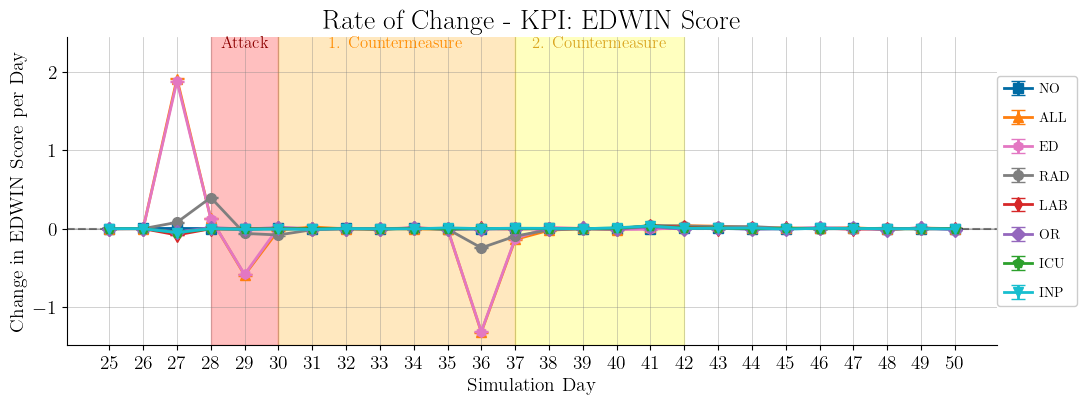

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

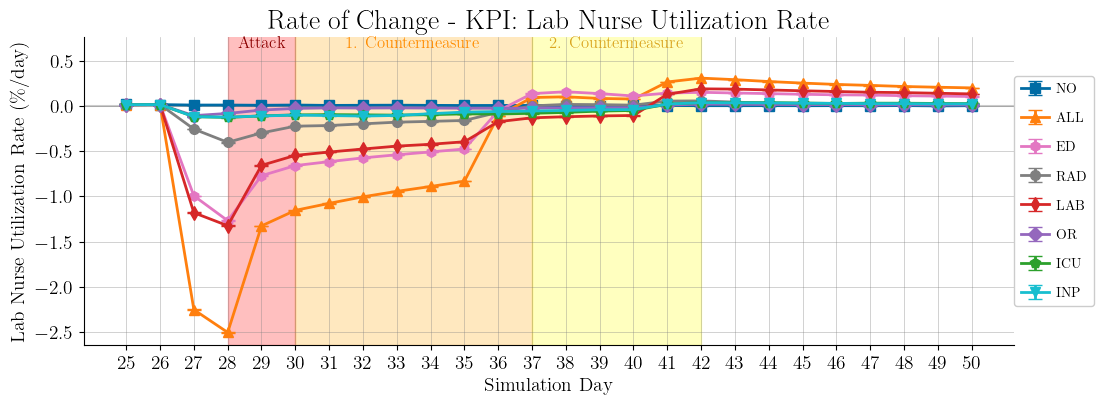

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

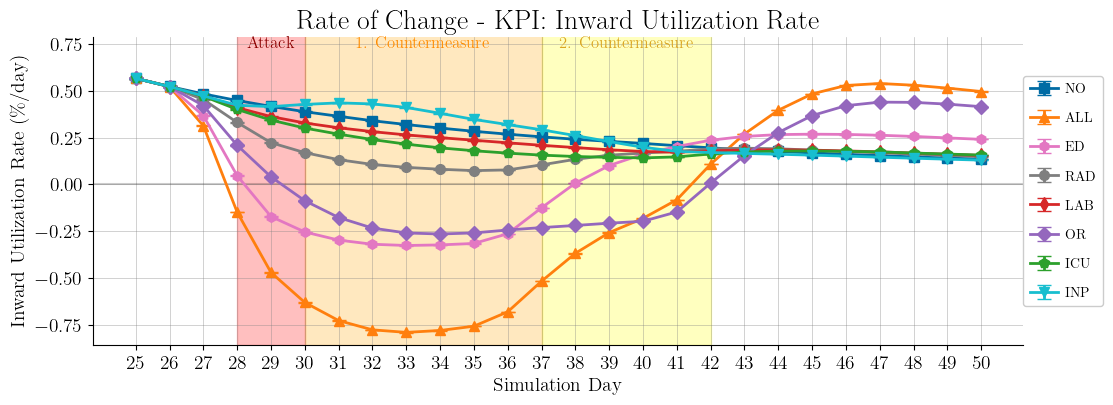

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

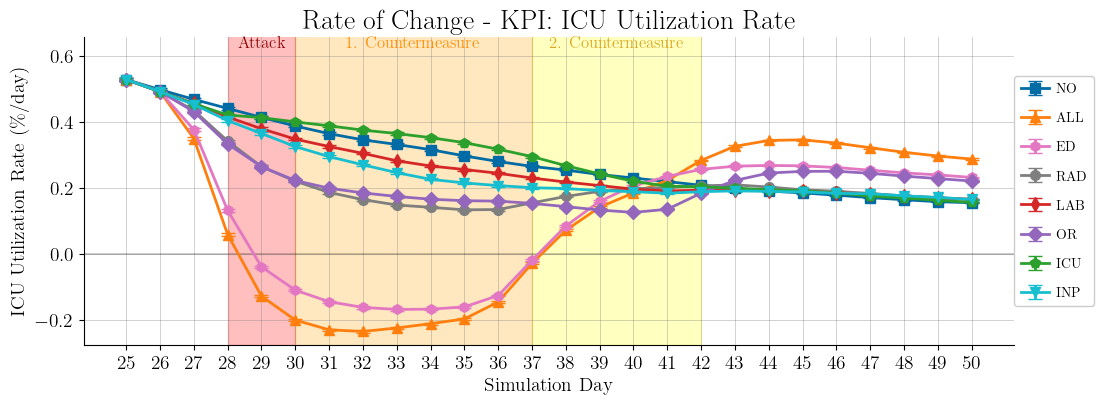

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

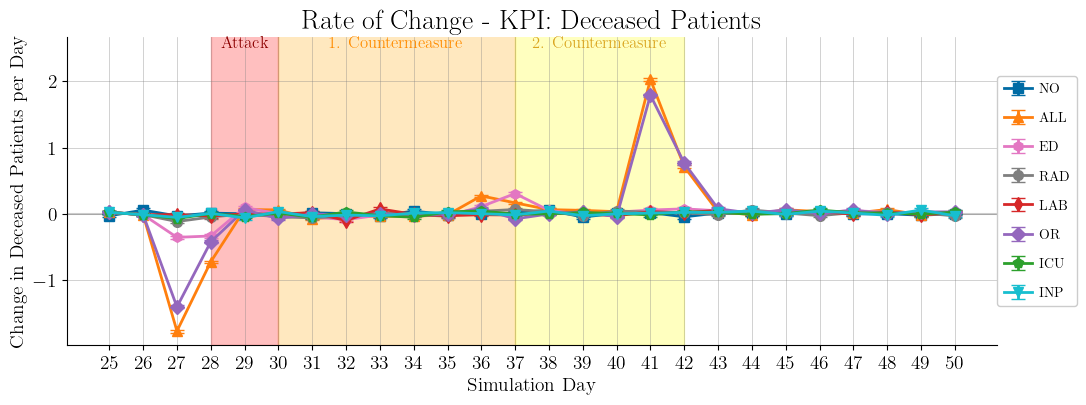

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

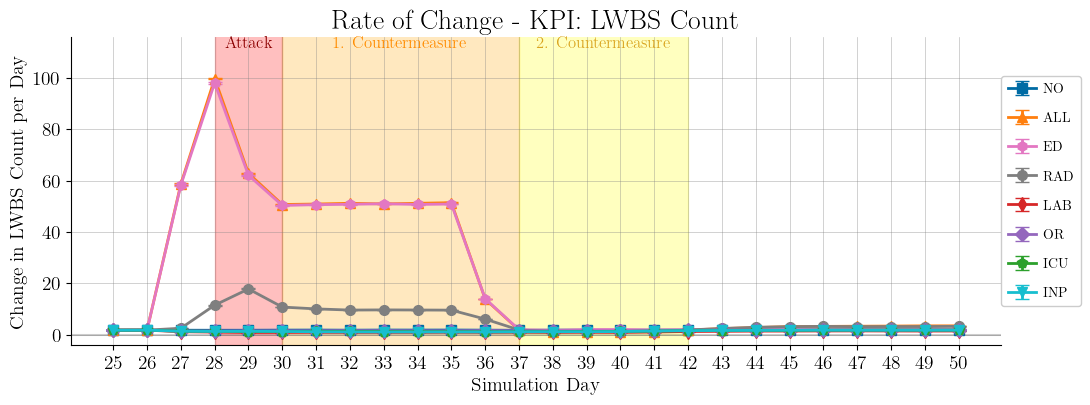

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

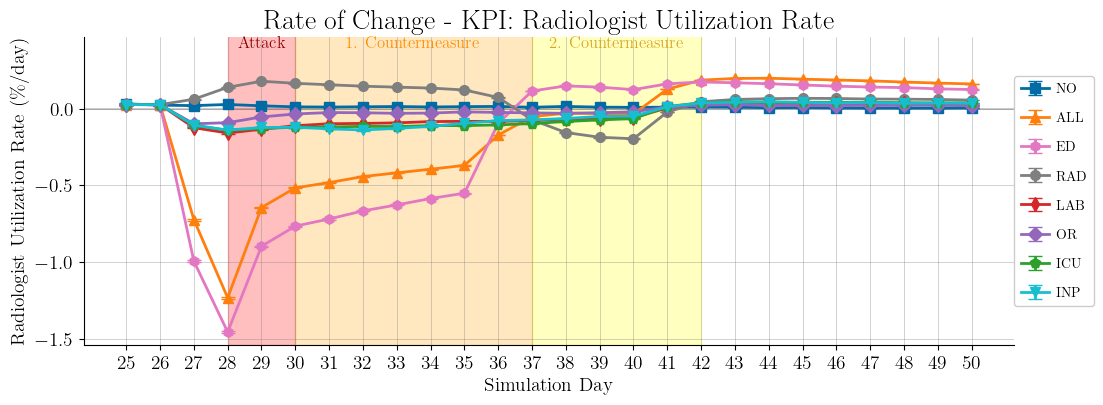

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

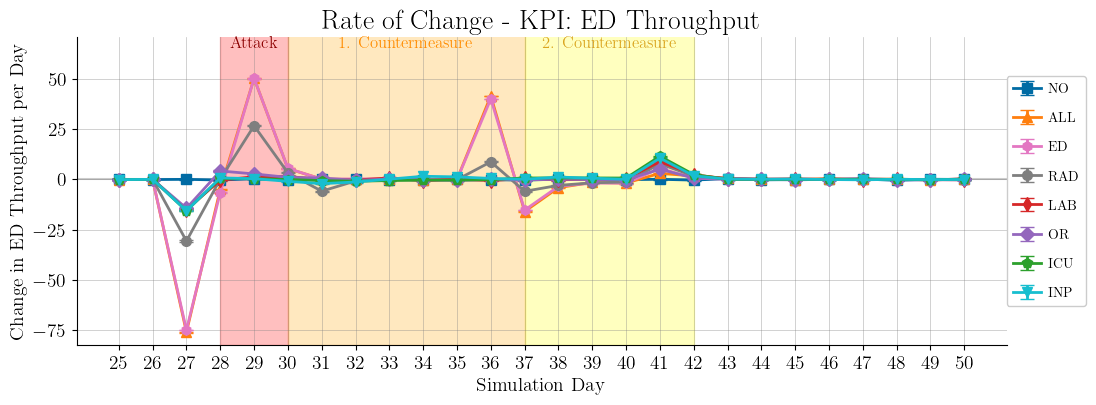

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

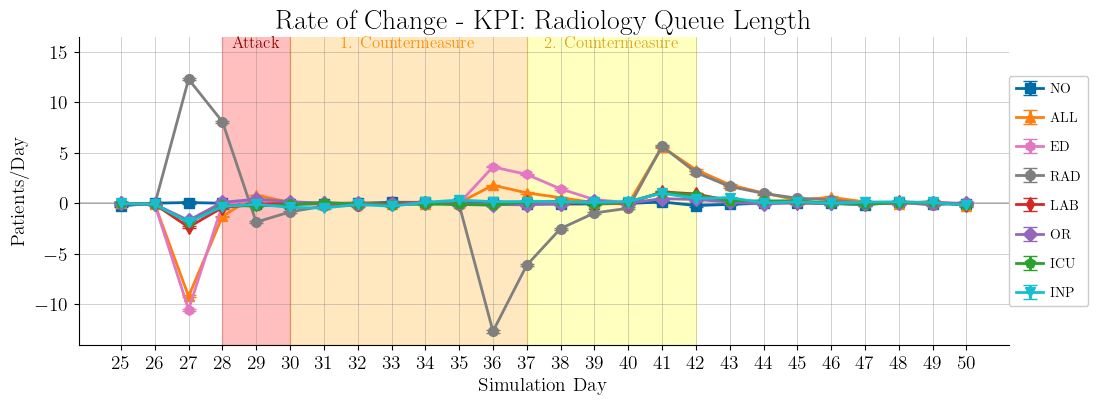

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

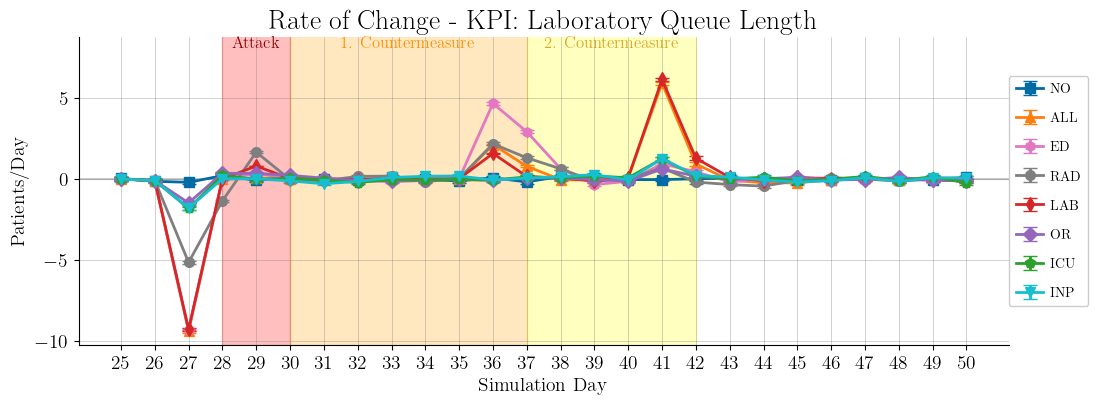

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

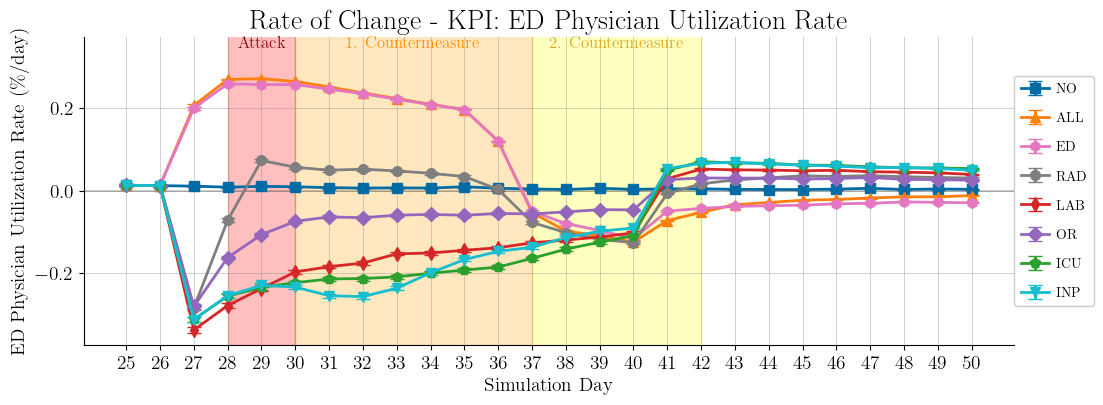

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

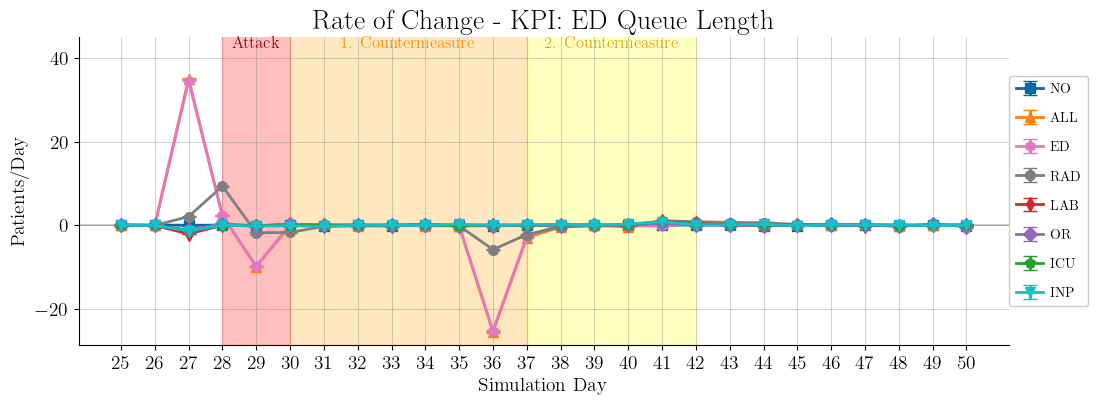

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

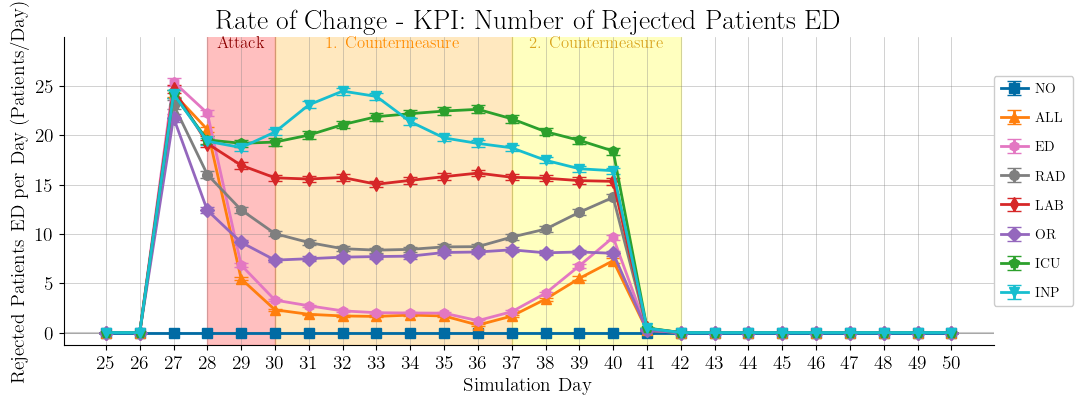

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

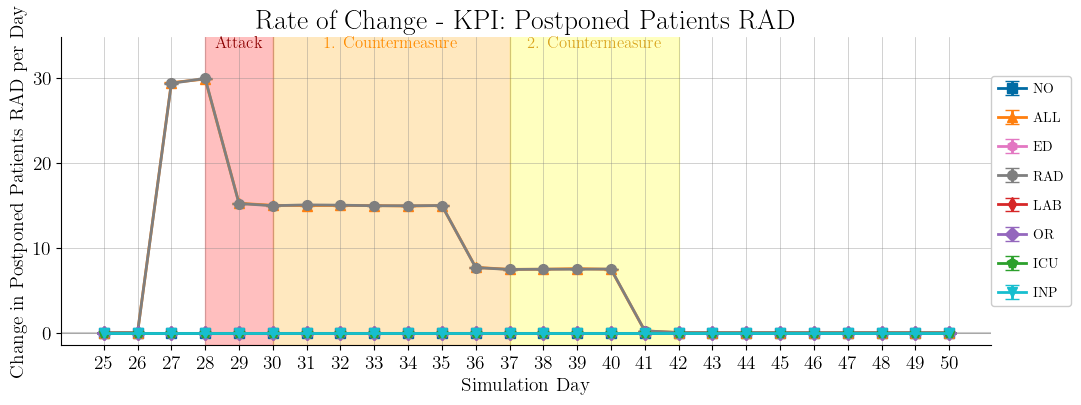

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

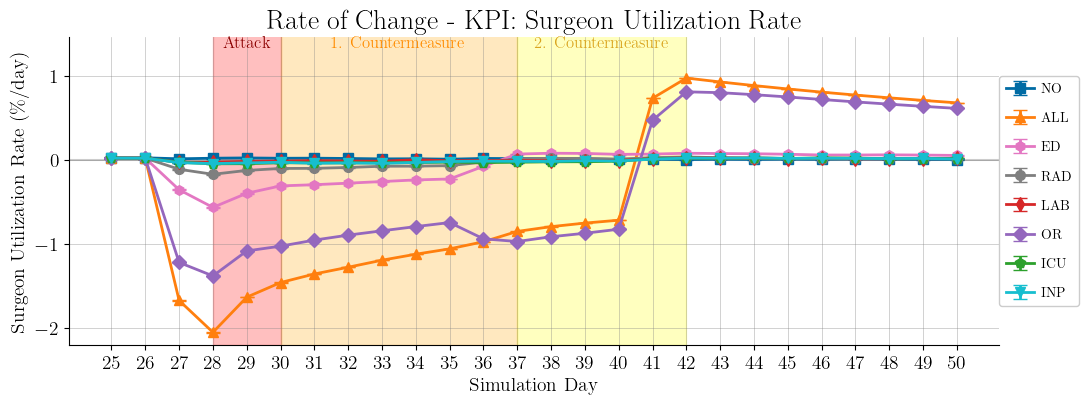

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

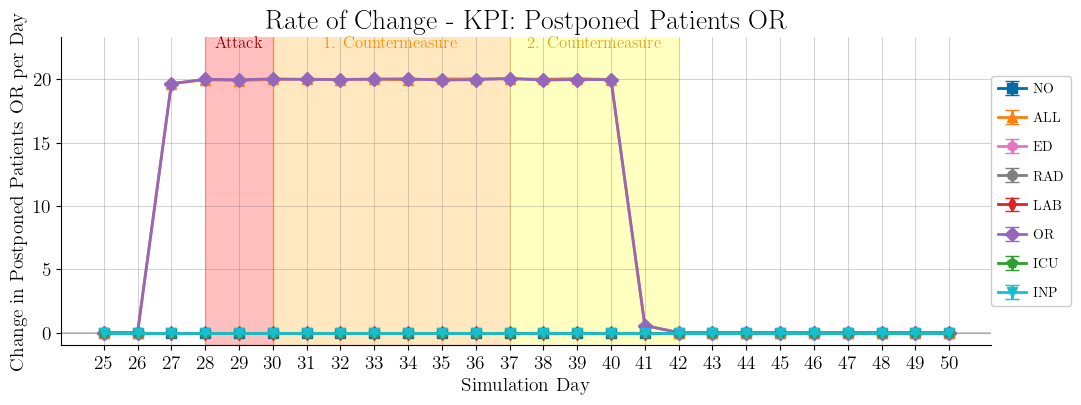

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

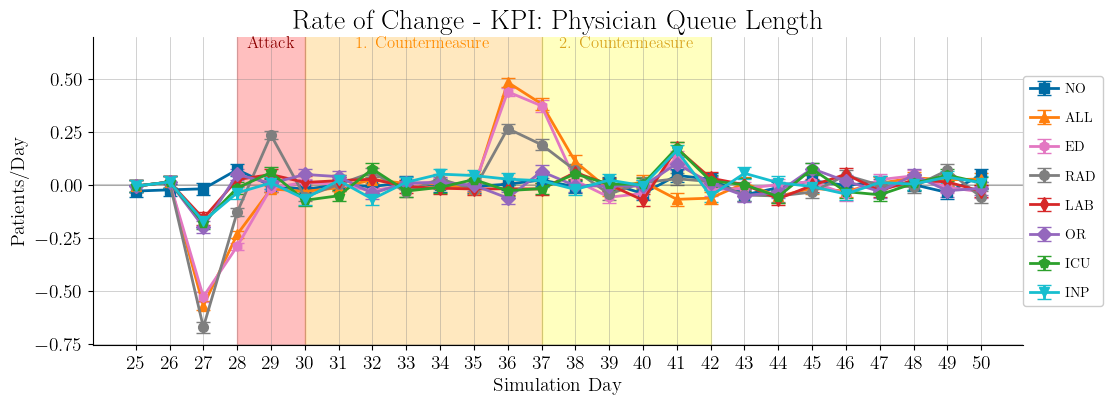

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

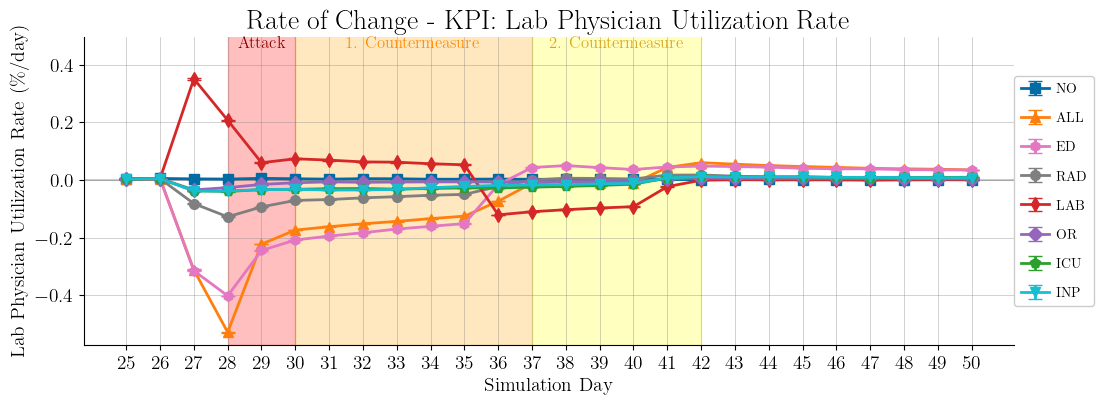

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

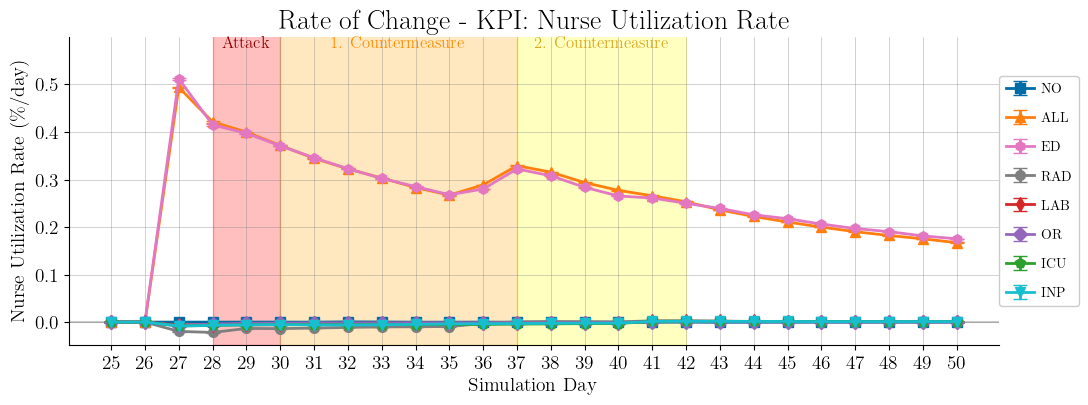

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

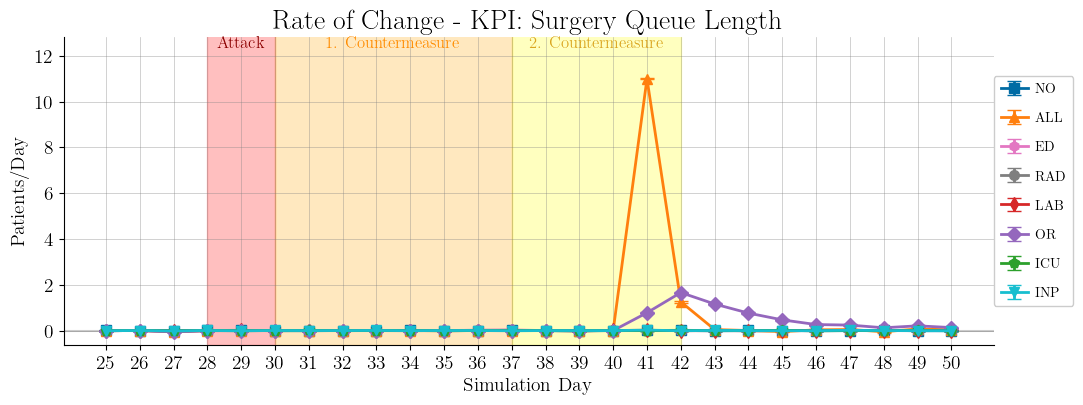

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

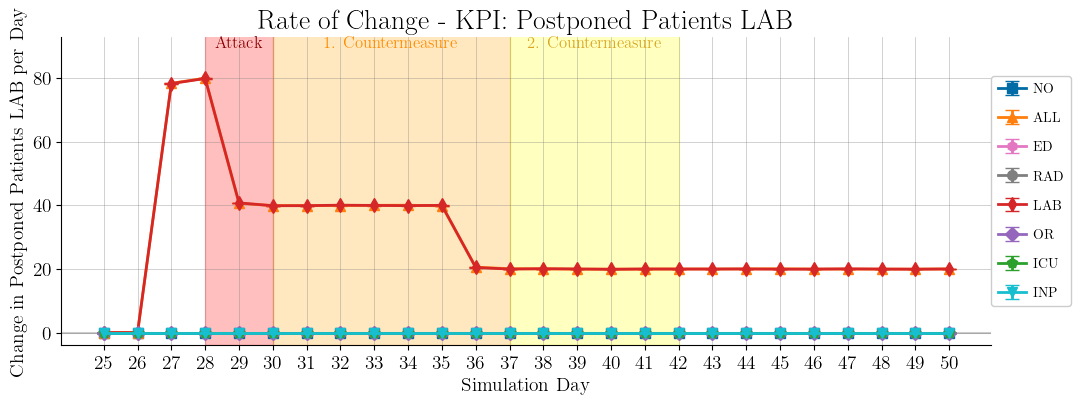

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

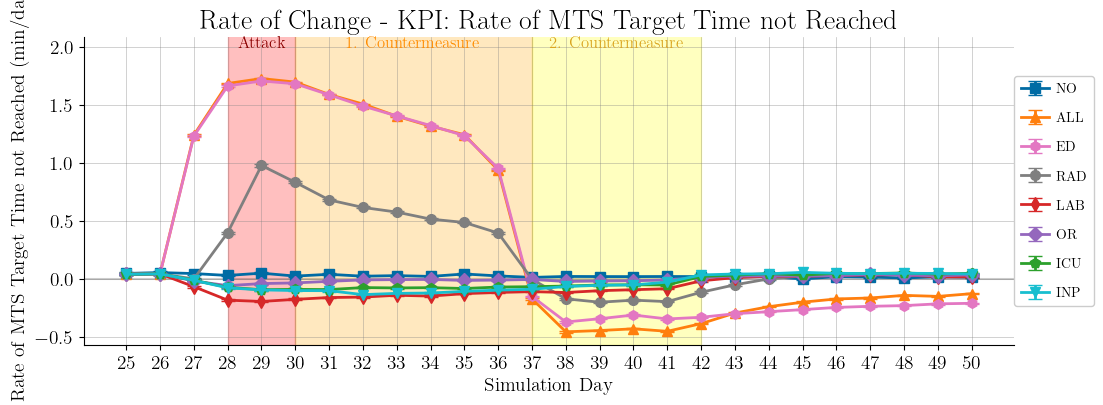

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

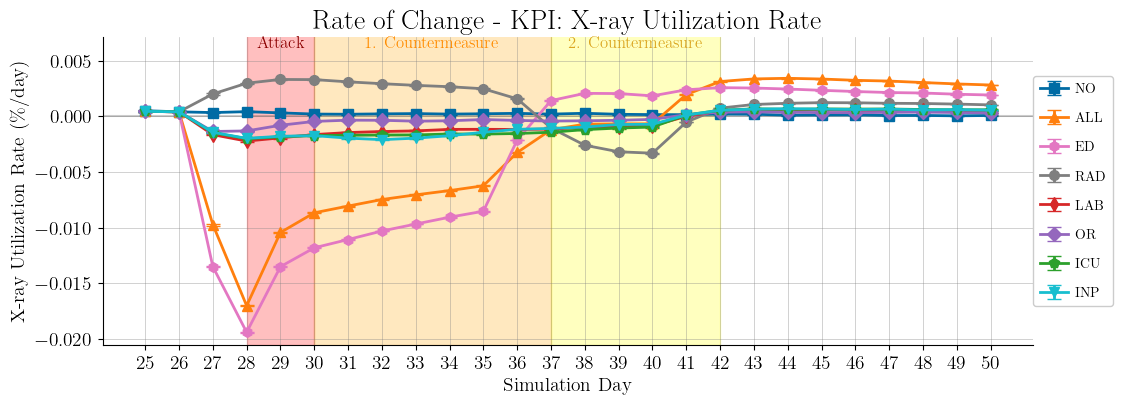

/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3vg5pk080000gn/T/ipykernel_1444/4092588520.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(mean_values.index[1:], derivative_values[1:], yerr=std_error[1:],
/var/folders/qv/kk5qz0g518jbkj2x3v

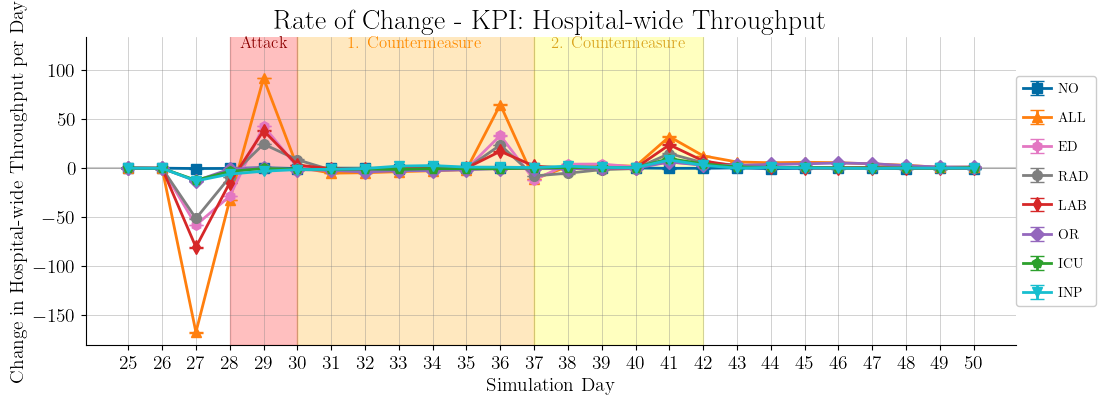

In [50]:
dataset_titles = dict(zip(dataset_names, titles_dataset))

for dataset in dataset_names:
    combined_df = pd.DataFrame()
    for scenario in scenarios:
        df = read_specific_dataset(pathFiles, dataset, scenario)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    plot_mean_and_derivative(combined_df, dataset_titles[dataset], f'KPI: {dataset_titles[dataset]}', 23, 50)

In [ ]:
def plot_specific_seed_mapped(df, df_main_kpis, seed_number, ylableTitle, title, start_day=None, end_day=None, output_dir='Line_plots_single_factor_small/'):
    """
    Plot values for a specific simulation run across different scenarios based on seed number.
    Maps seed numbers from main_kpis to correct indices in the combined dataset.
    
    Parameters:
    df (DataFrame): Combined DataFrame containing all scenarios and daily data
    df_main_kpis (DataFrame): DataFrame containing the main KPIs and seed numbers
    seed_number (int): Seed number to plot
    ylableTitle (str): Label for y-axis
    title (str): Title of the plot
    start_day (int): First day to plot
    end_day (int): Last day to plot
    output_dir (str): Directory for saving plots
    """
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Dictionary to store indices for each scenario
    scenario_indices = {}
    
    # Find indices for each scenario
    for scenario in df['Scenario'].unique():
        # Get scenario-specific data from main_kpis
        scenario_main_kpis = df_main_kpis[df_main_kpis['Scenario'] == scenario]
        scenario_df = df[df['Scenario'] == scenario]
        
        # Find the row index where seed matches
        seed_row = scenario_main_kpis[scenario_main_kpis['seed'] == seed_number]
        
        if len(seed_row) == 0:
            print(f"Warning: Seed {seed_number} not found in scenario {scenario}")
            continue
            
        # Get the relative index within this scenario
        relative_idx = seed_row.index[0] - scenario_main_kpis.index[0]
        scenario_indices[scenario] = relative_idx
        
        if start_day is not None and end_day is not None:
            simulation_days = scenario_df.columns[start_day:end_day]
        else:
            simulation_days = scenario_df.columns[:50]
        
        # Get values for specific run using the mapped index
        run_values = scenario_df[simulation_days].iloc[relative_idx]
        
        # Plot values
        ax.plot(run_values.index, run_values, '-o',
                label=f"{scenario}", 
                color=scenario_colors[scenario], 
                marker=marker_styles[scenario], 
                linewidth=2, 
                markersize=7)
    
    # Print found indices for verification
    print(f"\nIndices mapped for seed {seed_number}:")
    for scenario, idx in scenario_indices.items():
        print(f"{scenario}: {idx}")

    # Get y-axis limits and calculate extended height
    ymin, ymax = ax.get_ylim()
    span_height = ymax + (ymax - ymin) * 0.1
    text_y = ymax + (ymax - ymin) * 0.05

    # Add EDWIN Score background if applicable
    if 'EDWIN Score' in title:
        ax.axhline(y=1.08, color='black', alpha=0.4, linestyle='--')
        ax.axhline(y=1.83, color='black', alpha=0.4, linestyle='--')

        x_pos = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.8
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)

        ax.text(x_pos, 0.7, 'Normal Conditions',
                verticalalignment='center',
                horizontalalignment='left',
                fontsize=14,
                color='darkgreen',
                fontweight='bold',
                bbox=bbox_props)
        
        ax.text(x_pos, 1.455, 'Crowded',
                verticalalignment='center',
                horizontalalignment='left',
                fontsize=14,
                color='darkorange',
                fontweight='bold',
                bbox=bbox_props)
        
        ax.text(x_pos, (ymax + 1.83)/2, 'Overcrowded',
                verticalalignment='center',
                horizontalalignment='left',
                fontsize=14,
                color='darkred',
                fontweight='bold',
                bbox=bbox_props)
    
    # Add colored regions with text
    ax.axvspan(0, 2, ymin=0, ymax=1.1, color='red', alpha=0.25)
    ax.text(1, text_y, 'Attack', 
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='darkred',
            fontweight='bold')
    
    ax.axvspan(2, 9, ymin=0, ymax=1.1, color='orange', alpha=0.25)
    ax.text(5.5, text_y, '1. Countermeasure',
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='darkorange',
            fontweight='bold')
    
    ax.axvspan(9, 14, ymin=0, ymax=1.1, color='yellow', alpha=0.25)
    ax.text(11.5, text_y, '2. Countermeasure',
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='goldenrod',
            fontweight='bold')
    
    # Update y-axis limits
    ax.set_ylim(ymin, span_height)

    # Set y-axis label based on content
    if 'Time' in ylableTitle:
        ylabel = f'{ylableTitle} (min)'
    elif 'Utilization' in ylableTitle or 'utilization' in title:
        ylabel = rf'{ylableTitle} (\%)'
    elif 'Postponed' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients)'
    elif 'Rejected' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients)'
    elif 'Throughput' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients/Day)'
    elif 'Rate' in ylableTitle:
        ylabel = f'LWBS Rate (\%)'
    elif 'Queue' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients)'
    elif 'EDWIN' in ylableTitle:
        ylabel = 'EDWIN Score'
    elif 'Deceased' in ylableTitle:
        ylabel = f'{ylableTitle} (Patients/Day)'
    elif 'LWBS' in ylableTitle:
        ylabel = 'Number of LWBS (Patients)'
    else:
        ylabel = ylableTitle

    ax.set_title(f'{title}\nSeed: {seed_number}', fontsize=20)
    ax.set_xlabel('Simulation Day', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(bbox_to_anchor=(1, 0.5),
            loc='center left',
            borderaxespad=0,
            frameon=True,
            labelspacing=1.2,
            handletextpad=0.5,
            borderpad=0.5,
            title_fontsize=12,
            framealpha=1.0)
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.tick_params(labelsize=14)
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    plt.savefig(f'{output_dir}line_plot_{title}_seed_{seed_number}.pdf', 
                format='pdf', 
                bbox_inches='tight')
    plt.show()

In [ ]:
# Create a dictionary to map dataset names to titles
dataset_titles = dict(zip(dataset_names, titles_dataset))

# Read and plot for each dataset
for dataset in dataset_names:
    combined_df = pd.DataFrame()
    for scenario in scenarios:
        df = read_specific_dataset(pathFiles, dataset, scenario)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    # Plot specific simulation run (e.g., run index 1000)
    plot_specific_seed_mapped(df=combined_df,
                    df_main_kpis=df_combined,  # Your main KPIs DataFrame containing seed numbers 
                     seed_number=106916, 
                     ylableTitle=dataset_titles[dataset], 
                     title=f'KPI: {dataset_titles[dataset]}',
                     start_day=0, 
                     end_day=50)

In [ ]:
def plot_derivative_run(df, run_index, ylableTitle, title, start_day=None, end_day=None, output_dir='Line_plots_single_factor_small/'):
    """
    Plot the derivative (rate of change) for a specific simulation run across different scenarios.
    """
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
    for scenario in df['Scenario'].unique():
        scenario_df = df[df['Scenario'] == scenario]
        
        if start_day is not None and end_day is not None:
            simulation_days = scenario_df.columns[start_day:end_day]
        else:
            simulation_days = scenario_df.columns[:50]
        
        # Get values for specific run
        run_values = scenario_df[simulation_days].iloc[run_index]
        
        # Calculate derivative (difference between consecutive days)
        derivative = np.diff(run_values)
        # Use the days as x-axis points (excluding the last one since diff reduces length by 1)
        x_points = np.arange(len(derivative))

        ax.plot(x_points, derivative, '-o',
                label=scenario, 
                color=scenario_colors[scenario], 
                marker=marker_styles[scenario], 
                linewidth=2, 
                markersize=7)

    # Get y-axis limits and calculate extended height
    ymin, ymax = ax.get_ylim()
    span_height = ymax + (ymax - ymin) * 0.1
    text_y = ymax + (ymax - ymin) * 0.05
    
    # Add colored regions with text
    ax.axvspan(0, 2, ymin=0, ymax=1.1, color='red', alpha=0.25)
    ax.text(1, text_y, 'Attack', 
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='darkred',
            fontweight='bold')
    
    ax.axvspan(2, 9, ymin=0, ymax=1.1, color='orange', alpha=0.25)
    ax.text(5.5, text_y, '1. Countermeasure',
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='darkorange',
            fontweight='bold')
    
    ax.axvspan(9, 14, ymin=0, ymax=1.1, color='yellow', alpha=0.25)
    ax.text(11.5, text_y, '2. Countermeasure',
            horizontalalignment='center',
            verticalalignment='bottom',
            rotation=0,
            fontsize=14,
            color='goldenrod',
            fontweight='bold')
    
    # Update y-axis limits
    ax.set_ylim(ymin, span_height)

    # Add horizontal line at y=0 to show baseline
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)

    # Set y-axis label based on content
    if 'Time' in ylableTitle:
        ylabel = f'Change in {ylableTitle} (min/day)'
    elif 'Utilization' in ylableTitle or 'utilization' in title:
        ylabel = rf'Change in {ylableTitle} (\%/day)'
    elif 'Postponed' in ylableTitle:
        ylabel = f'Change in {ylableTitle} (Patients/day)'
    elif 'Rejected' in ylableTitle:
        ylabel = f'Change in {ylableTitle} (Patients/day)'
    elif 'Throughput' in ylableTitle:
        ylabel = f'Change in {ylableTitle} (Patients/day²)'
    elif 'Rate' in ylableTitle:
        ylabel = f'Change in LWBS Rate (\%/day)'
    elif 'Queue' in ylableTitle:
        ylabel = f'Change in {ylableTitle} (Patients/day)'
    elif 'EDWIN' in ylableTitle:
        ylabel = 'Change in EDWIN Score per day'
    elif 'Deceased' in ylableTitle:
        ylabel = f'Change in {ylableTitle} (Patients/day²)'
    elif 'LWBS' in ylableTitle:
        ylabel = 'Change in Number of LWBS (Patients/day)'
    else:
        ylabel = f'Change in {ylableTitle} per day'

    ax.set_title(f'Rate of Change - {title}', fontsize=20)
    ax.set_xlabel('Simulation Day', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(bbox_to_anchor=(1, 0.5),
            loc='center left',
            borderaxespad=0,
            frameon=True,
            labelspacing=1.2,
            handletextpad=0.5,
            borderpad=0.5,
            title_fontsize=12,
            framealpha=1.0)
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.tick_params(labelsize=14)
    plt.show()

In [ ]:
# Create a dictionary to map dataset names to titles
dataset_titles = dict(zip(dataset_names, titles_dataset))

# Read and plot for each dataset
for dataset in dataset_names:
    combined_df = pd.DataFrame()
    for scenario in scenarios:
        df = read_specific_dataset(pathFiles, dataset, scenario)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    # Plot specific simulation run (e.g., run index 1000)
    plot_derivative_run(combined_df, 
                     run_index=19921, 
                     ylableTitle=dataset_titles[dataset], 
                     title=f'KPI: {dataset_titles[dataset]}',
                     start_day=0, 
                     end_day=50)

In [ ]:
# Combine all MAIN KPIs
pathFiles = '../Files/SingleFactorExperiment/SHORT'
df_combined = pd.concat(
    [preprocess_data(f"{pathFiles}/{secnario}/MainKPIs/MainKPIs.csv", secnario) for secnario in scenarios],
    ignore_index=True
)
df_combined = recalculate_mortality_rate(df_combined, pathFiles, scenarios)
df_combined = calculate_ed_throughput(df_combined, pathFiles, scenarios)
plot_kpis(df_combined, kpi_columns, scenarios, color_palette, pathBoxplots, titles)

In [ ]:
# Create a dictionary to map dataset names to titles
dataset_titles = dict(zip(dataset_names, titles_dataset))
# Read and plot for each dataset
pathFiles = '../Files/SingleFactorExperiment/SHORT'
for dataset in dataset_names:
    combined_df = pd.DataFrame()
    for scenario in scenarios:
        df = read_specific_dataset(pathFiles, dataset, scenario)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    plot_mean_and_error(combined_df, dataset_titles[dataset], f'KPI: {dataset_titles[dataset]}',0, 25)

In [ ]:
# Create a dictionary to map dataset names to titles
dataset_titles = dict(zip(dataset_names, titles_dataset))
pathFiles = '../Files/SingleFactorExperiment/SHORT'
# Read and plot for each dataset
for dataset in dataset_names:
    combined_df = pd.DataFrame()
    for scenario in scenarios:
        df = read_specific_dataset(pathFiles, dataset, scenario)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    # Plot specific simulation run (e.g., run index 1000)
    plot_specific_run(combined_df, 
                     run_index=160, 
                     ylableTitle=dataset_titles[dataset], 
                     title=f'KPI: {dataset_titles[dataset]}',
                     start_day=0, 
                     end_day=50)

In [ ]:
def plot_icu_mortality_correlation_multi(df, scenarios, output_dir='Scatter_plots/'):
    """
    Create scatter plot comparing ICU waiting time vs mortality rate with highlighted maximums
    
    Parameters:
    df (DataFrame): Combined DataFrame containing all scenarios
    scenarios (list): List of scenarios to plot
    output_dir (str): Output directory for saving plots
    """
    fig, ax = plt.subplots(figsize=(10, 4))
    
    for scenario in scenarios:
        scenario_df = df[df['Scenario'] == scenario]
        
        # Plot scatter points
        scatter = ax.scatter(scenario_df['mortality_rate'], 
                           scenario_df['avg_waiting_time_icu'],
                           alpha=0.5,
                           c=scenario_colors[scenario],
                           s=50,
                           label=f'{scenario}')
        
        # Find and highlight maximum mortality rate point
        max_mortality_idx = scenario_df['mortality_rate'].idxmax()
        max_mortality_point = scenario_df.loc[max_mortality_idx]
        
        # Add highlighted point
        ax.scatter(max_mortality_point['mortality_rate'],
                  max_mortality_point['avg_waiting_time_icu'],
                  c=scenario_colors[scenario],
                  s=150,
                  marker='*',
                  edgecolor='black',
                  linewidth=1,
                  zorder=5)
        
    
    # Customize plot
    ax.set_title('Average Waiting Time for ICU-Bed vs Mortality Rate', 
                fontsize=14, pad=20)
    ax.set_xlabel('Mortality Rate (\%)', fontsize=12)
    ax.set_ylabel('Average Waiting Time for ICU-Bed(min)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Scenarios', 
             bbox_to_anchor=(1.01, 1),
             loc='upper left')
    
    # Adjust layout and save
    plt.tight_layout()
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(f'{output_dir}scatter_icu_mortality_{"_".join(scenarios)}.pdf', 
                format='pdf', 
                bbox_inches='tight')
    plt.show()

# Example usage
plot_icu_mortality_correlation_multi(df_combined, scenarios=['ALL'])